# Data wrangling

In [4]:
#load required packages
library(tidyverse)
library(dplyr)
library(tidyr)
library(lubridate)
library(gganimate)
library(zoo)
library(ggplot2)
library(viridis)
library(hrbrthemes)

ERROR: Error: package or namespace load failed for 'hrbrthemes' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called 'Rttf2pt1'


In [11]:
#read raw data
data_covid_raw <- read_csv(file="WHO-COVID-19-global-data.csv")
data_WDICountry_raw <-read_csv(file="WDICountry.csv")
data_WDIData_raw <-read_csv(file="WDIData.csv")
data_GEPData_raw <-read_csv(file="GEPData.csv")

Parsed with column specification:
cols(
  Date_reported = col_date(format = ""),
  Country_code = col_character(),
  Country = col_character(),
  WHO_region = col_character(),
  New_cases = col_double(),
  Cumulative_cases = col_double(),
  New_deaths = col_double(),
  Cumulative_deaths = col_double()
)

Warning message:
"Missing column names filled in: 'X31' [31]"
Parsed with column specification:
cols(
  .default = col_character(),
  `PPP survey year` = col_logical(),
  `Latest industrial data` = col_double(),
  `Latest trade data` = col_double(),
  X31 = col_logical()
)

See spec(...) for full column specifications.

Warning message:
"Missing column names filled in: 'X66' [66]"
Parsed with column specification:
cols(
  .default = col_double(),
  `Country Name` = col_character(),
  `Country Code` = col_character(),
  `Indicator Name` = col_character(),
  `Indicator Code` = col_character(),
  X66 = col_logical()
)

See spec(...) for full column specifications.

Warning message:
"Missi

In [32]:
#Check country code and Unified country code
data_WDICountry_code<-data_WDICountry_raw %>%
rename(Country_Code = "Country Code",Country_Code_2="2-alpha code", Table_Name="Table Name")
data_WDICountry_code<-data_WDICountry_code %>%
select(Country_Code,Country_Code_2,Table_Name)
data_GEPData <- data_GEPData_raw %>% rename(Country_Code_gep = "Country Code",Country_Name = "Country Name")
data_GEPData<-data_GEPData %>% select(Country_Name,Country_Code_gep)

#Country code in GEP data set not match in WDICountry data set
result <-full_join(data_WDICountry_code,data_GEPData,by=c("Country_Code"="Country_Code_gep")) 
result %>%
filter(is.na(Table_Name))

Country_Code,Country_Code_2,Table_Name,Country_Name
<chr>,<chr>,<chr>,<chr>
AME,NA,NA,Advanced economies
EAA,NA,NA,East Asia and Pacific
EMD,NA,NA,Emerging Markets and Developing Economies (EMDE)
E19,NA,NA,Euro Area
ECH,NA,NA,Europe and Central Asia
LAP,NA,NA,Latin America and the Caribbean
MNH,NA,NA,Middle East and North Africa
SAP,NA,NA,South Asia
SSP,NA,NA,Sub-Saharan Africa


In [182]:
library("readxl")
#Tidy dataset
mydata_realGDP <- read_excel("GlobalEconomicProspectsJune2020GDPgrowthdata.xlsx",sheet="Table 1.1")
#str(mydata_realGDP)
which(mydata_realGDP[,1]=="World") # No.4 row
which(mydata_realGDP[,1]=="Non-energy commodity price index") # No.47 row

mydata_realGDP<-mydata_realGDP[3:47,]
#Check NA Columns and Rows
which(is.na(mydata_realGDP[1,])) # No.2-5,11 columns
mydata_realGDP1 <-mydata_realGDP[-c(2:5,11)]
mydata_realGDP1<-rename(mydata_realGDP1,classification="TABLE 1.1 Real GDP1","2017"="...6","2018"="...7","2019e"="...8","2020f"="...9","2021f"="...10","2020fd"="...12","2021fd"="...13")
mydata_realGDP1_1<-mydata_realGDP1[2:45,]
mydata_realGDP1_1

New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ...



[1] 4

[1] 47

[1]  1  2  3  4  5 11

classification,2017,2018,2019e,2020f,2021f,2020fd,2021fd
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
World,3.3,3.0,2.4,-5.2,4.2,-7.7,1.6
Advanced economies,2.5,2.1,1.6,-7,3.9,-8.4,2.4
United States,2.4,2.9,2.2999999999999998,-6.1,4,-7.9,2.2999999999999998
Euro Area,2.5,1.9,1.2,-9.1,4.5,-10.1,3.2
Japan,2.2,0.3,0.7,-6.1,2.5,-6.8,1.9
Emerging market and developing economies,4.5,4.3,3.5,-2.5,4.5999999999999996,-6.6,0.3
Commodity-exporting EMDEs,2.2,2.1,1.5,-4.8,3.1,-7.4,0.2
Other EMDEs,6.1,5.7,4.8,-1.1000000000000001,5.5,-6.2,0.3
Other EMDEs excluding China,5.4,4.8,3.2,-3.6,3.6,-7.6,-0.8


In [181]:
mydata_lowincome <- read_excel("GlobalEconomicProspectsJune2020GDPgrowthdata.xlsx",sheet="Low-Income Countries")
#mydata_lowincome
which(mydata_lowincome[,2]=="Low-Income Country, GDPb") # No.4 row
which(mydata_lowincome[,2]=="Ugandad") # No.31 row
mydata_lowincome1 <- mydata_lowincome[3:31,]
which(is.na(mydata_lowincome1[1,])) #1,3,4,10
mydata_lowincome2 <-mydata_lowincome1[-c(1,3,4,10)]
mydata_lowincome3<-rename(mydata_lowincome2,classification="...2","2017"="...5","2018"="...6","2019e"="...7","2020f"="...8","2021f"="...9","2020fd"="...11","2021fd"="...12")
mydata_lowincome3

New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ...



[1] 4

[1] 31

[1]  1  2  3  4 10

classification,2017,2018,2019e,2020f,2021f,2020fd,2021fd
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,2017.0,2018.0,2019e,2020f,2021f,2020f,2021f
"Low-Income Country, GDPb",5.4,5.8,5,1,4.5999999999999996,-4.4000000000000004,-0.9
Afghanistan,2.7,1.8,2.9,-5.5,1,-8.5,-2.5
Benin,5.8,6.7,6.9,3.2,6,-3.5,-0.7
Burkina Faso,6.3,6.8,5.7,2,5.8,-4,-0.2
Burundi,0.5,1.6,1.8,1,2.2999999999999998,-1,0.2
Central African Republicc,4.5,3.7,3.1,0.8,3.5,-4.0999999999999996,-1.4
Chad,-3.0,2.6,3.2,-0.2,4.7,-5.7,-0.1
"Congo, Dem. Rep.",3.7,5.8,4.4000000000000004,-2.2000000000000002,3.5,-6.1,0.1


In [180]:
mydata_EAP <- read_excel("GlobalEconomicProspectsJune2020GDPgrowthdata.xlsx",sheet="EAP")
#mydata_EAP
which(mydata_EAP[,1]=="EMDE EAP, GDP1") # No.4 row
which(mydata_EAP[,1]=="Thailand") # No.19 row
mydata_EAP <-mydata_EAP[-c(7)]
mydata_EAP1 <- mydata_EAP[3:19,]
mydata_EAP1_1<-rename(mydata_EAP1,classification="TABLE 2.1.1 East Asia and Pacific forecast summary","2017"="...2","2018"="...3","2019e"="...4","2020f"="...5","2021f"="...6","2020fd"="...8","2021fd"="...9")
mydata_EAP1_1<-mydata_EAP1_1[2:17,]
which(mydata_EAP[,1]=="Cambodia") #No. 28 row
which(mydata_EAP[,1]=="Vietnam")  #No. 41 row
mydata_EAP2<- mydata_EAP[27:41,]
mydata_EAP2_2<-rename(mydata_EAP2,classification="TABLE 2.1.1 East Asia and Pacific forecast summary","2017"="...2","2018"="...3","2019e"="...4","2020f"="...5","2021f"="...6","2020fd"="...8","2021fd"="...9")
mydata_EAP2_2<-mydata_EAP2_2[2:15,]


New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ...



[1] 4

[1] 19 39

[1] 28

[1] 41

In [36]:
mydata_ECA <- read_excel("GlobalEconomicProspectsJune2020GDPgrowthdata.xlsx",sheet="ECA")
mydata_ECA <-mydata_ECA[-c(7)]
mydata_ECA1 <- mydata_ECA[3:26,]
mydata_ECA1<-rename(mydata_ECA1,classification="TABLE 2.2.1 Europe and Central Asia forecast summary","2017"="...2","2018"="...3","2019e"="...4","2020f"="...5","2021f"="...6","2020fd"="...8","2021fd"="...9")
mydata_ECA1_1<-mydata_ECA1[2:24,]
mydata_ECA2<- mydata_ECA[33:57,]
mydata_ECA2_2<-rename(mydata_ECA2,classification="TABLE 2.2.1 Europe and Central Asia forecast summary","2017"="...2","2018"="...3","2019e"="...4","2020f"="...5","2021f"="...6","2020fd"="...8","2021fd"="...9")
mydata_ECA2_2 <-mydata_ECA2_2[2:25,]
mydata_ECA2_2

New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ...



classification,2017,2018,2019e,2020f,2021f,2020fd,2021fd
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
Albania,3.8,4.1,2.2000000000000002,-5,8.8000000000000007,-8.4,5.2
Armenia,7.5,5.2,7.6,-2.8,4.9000000000000004,-7.9,-0.3
Azerbaijan,0.2,1.5,2.2000000000000002,-2.6,2.2000000000000002,-4.9000000000000004,0.1
Belarus,2.5,3.1,1.2,-4,1,-4.9000000000000004,0.5
Bosnia and Herzegovina2,3.2,3.7,2.6,-3.2,3.4,-6.6,-0.5
Bulgaria,3.5,3.1,3.4,-6.2,4.3,-9.1999999999999993,1.2
Croatia,3.1,2.7,2.9,-9.3000000000000007,5.4,-11.9,3
Georgia,4.8,4.8,5.0999999999999996,-4.8,4,-9.1,-0.5
Hungary,4.3,5.1,4.9000000000000004,-5,4.5,-8,1.9


In [37]:
mydata_LAC <- read_excel("GlobalEconomicProspectsJune2020GDPgrowthdata.xlsx",sheet="LAC")
mydata_LAC <-mydata_LAC[-c(7)]
mydata_LAC1 <- mydata_LAC[3:21,]
mydata_LAC1<-rename(mydata_LAC1,classification="TABLE 2.3.1 Latin America and the Caribbean forecast summary","2017"="...2","2018"="...3","2019e"="...4","2020f"="...5","2021f"="...6","2020fd"="...8","2021fd"="...9")
mydata_LAC1_1<-mydata_LAC1[2:19,]
mydata_LAC2<- mydata_LAC[28:54,]
mydata_LAC2<-rename(mydata_LAC2,classification="TABLE 2.3.1 Latin America and the Caribbean forecast summary","2017"="...2","2018"="...3","2019e"="...4","2020f"="...5","2021f"="...6","2020fd"="...8","2021fd"="...9")
mydata_LAC2_2 <-mydata_LAC2[2:27,]
mydata_LAC2_2

New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ...



classification,2017,2018,2019e,2020f,2021f,2020fd,2021fd
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
Argentina,2.7,-2.5,-2.2000000000000002,-7.3,2.1,-6,0.7
Belize,1.9,2.1,0.3,-13.5,6.7,-15.6,4.9000000000000004
Bolivia,4.2,4.2,2.7,-5.9,2.2000000000000002,-8.9,-1
Brazil,1.3,1.3,1.1000000000000001,-8,2.2000000000000002,-10,-0.3
Chile,1.2,3.9,1.1000000000000001,-4.3,3.1,-6.8,0.1
Colombia,1.4,2.5,3.3,-4.9000000000000004,3.6,-8.5,-0.3
Costa Rica,3.9,2.7,2.1,-3.3,3,-5.8,0
Dominica2,-9.5,0.5,9.6,-4,4,-8.9,-0.1
Dominican Republic,4.7,7.0,5.0999999999999996,-0.8,2.5,-5.8,-2.5


In [38]:
mydata_MNA <- read_excel("GlobalEconomicProspectsJune2020GDPgrowthdata.xlsx",sheet="MNA")
mydata_MNA <-mydata_MNA[-c(7)]
mydata_MNA1 <- mydata_MNA[3:21,]
mydata_MNA1<-rename(mydata_MNA1,classification="TABLE 2.4.1 Middle East and North Africa forecast summary","2017"="...2","2018"="...3","2019e"="...4","2020f"="...5","2021f"="...6","2020fd"="...8","2021fd"="...9")
mydata_MNA1_1<-mydata_MNA1[2:19,]
mydata_MNA2<- mydata_MNA[28:44,]
mydata_MNA2<-rename(mydata_MNA2,classification="TABLE 2.4.1 Middle East and North Africa forecast summary","2017"="...2","2018"="...3","2019e"="...4","2020f"="...5","2021f"="...6","2020fd"="...8","2021fd"="...9")
mydata_MNA2_2 <-mydata_MNA2[2:17,]
mydata_MNA2_2

New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ...



classification,2017,2018,2019e,2020f,2021f,2020fd,2021fd
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
Algeria,1.3,1.4,0.8,-6.4,1.9,-8.3000000000000007,-0.3
Bahrain,4.3,1.8,1.8,-4.5,2.2999999999999998,-6.6,-0.1
Djibouti,5.4,8.4,7.5,1.3,9.1999999999999993,-6.2,1.2
Egypt2,4.2,5.3,5.6,3,2.1,-2.8,-3.9
Iran,3.8,-4.7,-8.1999999999999993,-5.3,2.1,-5.3,1.1000000000000001
Iraq,-2.5,-0.6,4.4000000000000004,-9.6999999999999993,1.9,-14.8,-0.8
Jordan,2.1,1.9,2,-3.5,2,-5.7,-0.4
Kuwait,-4.7,1.2,0.4,-5.4,1.1000000000000001,-7.6,-0.9
Lebanon,0.9,-1.9,-5.6,-10.9,-6.3,-11.2,-6.7


In [39]:
mydata_SAR <- read_excel("GlobalEconomicProspectsJune2020GDPgrowthdata.xlsx",sheet="SAR")
mydata_SAR <-mydata_SAR[-c(7)]
mydata_SAR1 <- mydata_SAR[3:20,]
mydata_SAR1<-rename(mydata_SAR1,classification="TABLE 2.5.1 South Asia forecast summary","2017"="...2","2018"="...3","2019e"="...4","2020f"="...5","2021f"="...6","2020fd"="...8","2021fd"="...9")
mydata_SAR1_1<-mydata_SAR1[2:18,]
mydata_SAR2<- mydata_SAR[27:38,]
mydata_SAR2<-rename(mydata_SAR2,classification="TABLE 2.5.1 South Asia forecast summary","2017"="...2","2018"="...3","2019e"="...4","2020f"="...5","2021f"="...6","2020fd"="...8","2021fd"="...9")
mydata_SAR2_2 <-mydata_SAR2[2:12,]
mydata_SAR2_2

New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ...



classification,2017,2018,2019e,2020f,2021f,2020fd,2021fd
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Calendar year basis 1,NA,NA,NA,NA,NA,NA,NA
Afghanistan,2.7,1.8,2.9,-5.5,1,-8.5,-2.5
Maldives,6.8,6.9,5.2,-13,8.5,-18.5,2.9
Sri Lanka,3.6,3.3,2.2999999999999998,-3.2,0,-6.5,-3.7
NA,NA,NA,NA,NA,NA,NA,NA
Fiscal year basis 1,16/17,17/18,18/19e,19/20f,20/21f,19/20f,20/21f
Bangladesh,7.3,7.9,8.1999999999999993,1.6,1,-5.6,-6.3
Bhutan,6.3,3.8,3.9,1.5,1.8,-4.0999999999999996,-5.8
India,8.3000000000000007,7,6.1,4.2,-3.2,-0.8,-9


In [40]:
mydata_SSA <- read_excel("GlobalEconomicProspectsJune2020GDPgrowthdata.xlsx",sheet="SSA")
mydata_SSA <-mydata_SSA[-c(7)]
mydata_SSA1 <- mydata_SSA[3:24,]
mydata_SSA1<-rename(mydata_SSA1,classification="TABLE 2.6.1 Sub-Saharan Africa forecast summary","2017"="...2","2018"="...3","2019e"="...4","2020f"="...5","2021f"="...6","2020fd"="...8","2021fd"="...9")
mydata_SSA1_1<-mydata_SSA1[2:22,]
mydata_SSA2<- mydata_SSA[27:78,]
mydata_SSA2<-rename(mydata_SSA2,classification="TABLE 2.6.1 Sub-Saharan Africa forecast summary","2017"="...2","2018"="...3","2019e"="...4","2020f"="...5","2021f"="...6","2020fd"="...8","2021fd"="...9")
mydata_SSA2_2 <-mydata_SSA2[6:52,]
mydata_SSA2_2

New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ...



classification,2017,2018,2019e,2020f,2021f,2020fd,2021fd
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
Angola,-0.1,-2.0,-0.9,-4,3.1,-5.5,0.7
Benin,5.8,6.7,6.9,3.2,6,-3.5,-0.7
Botswana,2.9,4.5,3.5,-9.1,4.2,-13.2,0
Burkina Faso,6.3,6.8,5.7,2,5.8,-4,-0.2
Burundi,0.5,1.6,1.8,1,2.2999999999999998,-1,0.2
Central African Republic2,4.5,3.7,3.1,0.8,3.5,-4.0999999999999996,-1.4
Cabo Verde,3.7,5.1,5.5,-5.5,5,-10.5,0
Cameroon,3.5,4.1,3.9,-0.2,3.4,-4.4000000000000004,-0.9
Chad,-3.0,2.6,3.2,-0.2,4.7,-5.7,-0.1


In [41]:
mydata_App <- read_excel("GlobalEconomicProspectsJune2020GDPgrowthdata.xlsx",sheet="Statistical Appendix")
mydata_App <-mydata_App[-c(1,2,4,10)]
mydata_App <- mydata_App[4:151,]
mydata_App<-rename(mydata_App,classification="...3","2017a"="...5","2018a"="...6","2019ea"="...7","2020fa"="...8","2021fa"="...9","18Q4"="...11","19Q1"="...12","19Q2"="...13","19Q3"="...14","19Q4"="...15","20Q1E"="...16")
mydata_App1<-mydata_App[2:148,]
mydata_App1$classification<-sub("[0-9.*]",replacement="",sub("[0-9]","",sub("[\\,]","",mydata_App1$classification,perl=T)))
mydata_App1

New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ...



classification,2017a,2018a,2019ea,2020fa,2021fa,18Q4,19Q1,19Q2,19Q3,19Q4,20Q1E
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
World,3.3,3.0,2.4,-5.2,4.2,2.6,2.5,2.4,2.5,2.4,..
Advanced economies,2.5,2.1,1.6,-7,3.9,1.7,1.8,1.6,1.7,1.4,..
United States,2.4,2.9,2.2999999999999998,-6.1,4,2.5,2.7,2.2999999999999998,2.1,2.2999999999999998,0.3
Euro Area,2.5,1.9,1.2,-9.1,4.5,1.2,1.4,1.2,1.3,1,-3.2
Japan,2.2000000000000002,0.3,0.7,-6.1,2.5,-0.3,0.8,0.9,1.8,-0.7,-2.2000000000000002
Emerging market and developing economies,4.5,4.3,3.5,-2.5,4.5999999999999996,4.2,3.8,3.8,3.8,4,..
East Asia and Pacific,6.5,6.3,5.9,0.5,6.6,6.3,6.1,5.9,5.8,5.7,-5.2
Cambodia,7,7.5,7.1,-1,6,..,..,..,..,..,..
China,6.8,6.6,6.1,1,6.9,6.5,6.4,6.2,6,6,-6.8


In [44]:
write.csv(mydata_App1,"Year_Quarterly_GDP_by_country.csv", row.names = FALSE)

In [42]:
#Combine all areas data in one dataframe
mydata_EAP1_1_1 <- cbind(mydata_EAP1_1[-c(3,12),], area = "EAS") 
mydata_ECA1_1_1 <- cbind(mydata_ECA1_1[-c(4,13),], area = "ECS")
mydata_LAC1_1_1 <- cbind(mydata_LAC1_1[-c(3,12),], area = "LCN") 
mydata_MNA1_1_1 <- cbind(mydata_MNA1_1[-c(3,12),], area = "MEA") 
mydata_SAR1_1_1 <- cbind(mydata_SAR1_1[-c(3,12),], area = "SAS")
mydata_SAR1_1_1 <- mydata_SAR1_1_1[-c(11),]
mydata_SSA1_1_1 <- cbind(mydata_SSA1_1[-c(3,12),], area = "SSF") 
mydata_summary <- rbind(mydata_EAP1_1_1, mydata_ECA1_1_1,mydata_LAC1_1_1,mydata_MNA1_1_1,mydata_SAR1_1_1,mydata_SSA1_1_1)
#Tidy classification information
mydata_summary$classification<-sub("[0-9.*]",replacement="",sub("[0-9]","",sub("[\\,]"," ",mydata_summary$classification,perl=T)))
mydata_summary


,classification,2017,2018,2019e,2020f,2021f,2020fd,2021fd,area
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,EMDE EAP GDP,6.5,6.3,5.9,0.5,6.6,-5.2,1,EAS
2,GDP per capita (US. dollars),5.8,5.6,5.2,-0.1,6,-5.2,1,EAS
3,EMDE EAP GDP,6.5,6.3,5.9,0.5,6.6,-5.2,1,EAS
4,PPP GDP,6.4,6.3,5.8,0.4,6.5,-5.3,0.9,EAS
5,Private consumption,6.1,8.4,6.5,0.8,8.8000000000000007,-6.1,2.2000000000000002,EAS
6,Public consumption,8.9,8.8,7.8,11.2,7.4,3.6,-0.1,EAS
7,Fixed investment,4.7,5.1,4.3,-0.2,4.0999999999999996,-4.8,-0.6,EAS
8,Exports GNFS,9.4,4.9,1.9,-10.3,4.2,-11.6,2.2000000000000002,EAS
9,Imports GNFS,8.3,8.4,0.3,-5.7,5.2,-7.7,2.7,EAS


In [ ]:
#Export dataset
write.csv(mydata_summary,"Summary_by_areas.csv", row.names = FALSE)

In [43]:
#Combine all areas data in one dataframe
mydata_EAP2_2_1 <- cbind(mydata_EAP2_2, area = "EAS") 
mydata_ECA2_2_1 <- cbind(mydata_ECA2_2, area = "ECS")
mydata_LAC2_2_1 <- cbind(mydata_LAC2_2, area = "LCN") 
mydata_MNA2_2_1 <- cbind(mydata_MNA2_2, area = "MEA") 
mydata_SAR2_2_1 <- cbind(mydata_SAR2_2, area = "SAS") 
#Remove NA 
mydata_SAR2_2_1 <-mydata_SAR2_2_1[-c(1,5,6),]
mydata_SSA2_2_1 <- cbind(mydata_SSA2_2, area = "SSF") 
mydata_RealGDP <- rbind(mydata_EAP2_2_1, mydata_ECA2_2_1,mydata_LAC2_2_1,mydata_MNA2_2_1,mydata_SAR2_2_1,mydata_SSA2_2_1)
#Tidy classification information
mydata_RealGDP$classification<-sub("[0-9.*]",replacement="",sub("[0-9]","",sub("[\\,]","",mydata_RealGDP$classification,perl=T)))
mydata_RealGDP


,classification,2017,2018,2019e,2020f,2021f,2020fd,2021fd,area
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Cambodia,7,7.5,7.1,-1,6,-7.8,-0.8,EAS
2,China,6.8,6.6,6.1,1,6.9,-4.9000000000000004,1.1000000000000001,EAS
3,Fiji,5.4,3.5,1,-4.3,1.9,-6,-1,EAS
4,Indonesia,5.1,5.2,5,0,4.8,-5.0999999999999996,-0.4,EAS
5,Lao PDR,6.9,6.3,4.7,1,4.5999999999999996,-4.8,-1.1000000000000001,EAS
6,Malaysia,5.7,4.7,4.3,-3.1,6.9,-7.6,2.4,EAS
7,Mongolia,5.3,6.9,4.8,-0.5,4.9000000000000004,-6,-0.3,EAS
8,Myanmar,6.2,6.8,6.3,1.5,6,-5.2,-0.8,EAS
9,Papua New Guinea,3.5,-0.8,6,-1.3,3.4,-4.2,0.5,EAS


In [ ]:
# Export data set
write.csv(mydata_RealGDP,"RealGDP_by_areas.csv", row.names = FALSE)

In [46]:
#Get Covid-19 Cumulative cases and Cumulative deaths by month
head(data_covid_raw)
data_covid_month <- data_covid_raw %>%
mutate(yr_mouth= Date_reported %>% format("%Y-%m-01")) %>%
group_by(yr_mouth,Country_code,Country,WHO_region) %>%
summarise(Cumulative_cases = max(Cumulative_cases),Cumulative_deaths=max(Cumulative_deaths))

head(data_covid_month)

Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
2020-01-08,AF,Afghanistan,EMRO,0,0,0,0


`summarise()` regrouping output by 'yr_mouth', 'Country_code', 'Country' (override with `.groups` argument)



yr_mouth,Country_code,Country,WHO_region,Cumulative_cases,Cumulative_deaths
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
2020-01-01,AD,Andorra,EURO,0,0
2020-01-01,AE,United Arab Emirates,EMRO,8,0
2020-01-01,AF,Afghanistan,EMRO,0,0
2020-01-01,AG,Antigua and Barbuda,AMRO,0,0
2020-01-01,AI,Anguilla,AMRO,0,0
2020-01-01,AL,Albania,EURO,0,0


In [60]:
#Check dataset details
head(data_covid_raw)
head(data_WDICountry_raw)
head(data_WDIData_raw)

Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
<date>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
2020-01-08,AF,Afghanistan,EMRO,0,0,0,0


Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,X31
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>
ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NA,Latin America & Caribbean,High income,AW,...,NA,Enhanced General Data Dissemination System (e-GDDS),2010,NA,NA,Yes,NA,NA,2016,NA
AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,NA,South Asia,Low income,AF,...,Consolidated central government,Enhanced General Data Dissemination System (e-GDDS),1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NA,NA,NA,2017,NA
AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NA,Sub-Saharan Africa,Lower middle income,AO,...,Budgetary central government,Enhanced General Data Dissemination System (e-GDDS),2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NA,NA,NA,2017,NA
ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NA,Europe & Central Asia,Upper middle income,AL,...,Consolidated central government,Enhanced General Data Dissemination System (e-GDDS),2011,"Demographic and Health Survey, 2017/18","Living Standards Measurement Study Survey (LSMS), 2012",Yes,2012,2013,2017,NA
AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NA,Europe & Central Asia,High income,AD,...,NA,NA,2011. Population data compiled from administrative registers.,NA,NA,Yes,NA,NA,NA,NA
ARB,Arab World,Arab World,Arab World,1A,NA,Arab World aggregate. Arab World is composed of members of the League of Arab States.,NA,NA,1A,...,NA,NA,NA,NA,NA,NA,NA,NA,2016,NA


Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,X66
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
Arab World,ARB,Access to clean fuels and technologies for cooking (% of population),EG.CFT.ACCS.ZS,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Arab World,ARB,"Access to electricity, rural (% of rural population)",EG.ELC.ACCS.RU.ZS,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Arab World,ARB,"Access to electricity, urban (% of urban population)",EG.ELC.ACCS.UR.ZS,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Arab World,ARB,Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),FX.OWN.TOTL.ZS,NA,NA,NA,NA,NA,NA,...,NA,NA,30.27713,NA,NA,37.16521,NA,NA,NA,NA
Arab World,ARB,"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",FX.OWN.TOTL.FE.ZS,NA,NA,NA,NA,NA,NA,...,NA,NA,22.07935,NA,NA,25.63540,NA,NA,NA,NA


In [48]:
#Remove invalide column
str(data_WDICountry_raw)
data_WDICountry <- data_WDICountry_raw[,1:30]
head(data_WDICountry)

tibble [263 x 31] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Country Code                                     : chr [1:263] "ABW" "AFG" "AGO" "ALB" ...
 $ Short Name                                       : chr [1:263] "Aruba" "Afghanistan" "Angola" "Albania" ...
 $ Table Name                                       : chr [1:263] "Aruba" "Afghanistan" "Angola" "Albania" ...
 $ Long Name                                        : chr [1:263] "Aruba" "Islamic State of Afghanistan" "People's Republic of Angola" "Republic of Albania" ...
 $ 2-alpha code                                     : chr [1:263] "AW" "AF" "AO" "AL" ...
 $ Currency Unit                                    : chr [1:263] "Aruban florin" "Afghan afghani" "Angolan kwanza" "Albanian lek" ...
 $ Special Notes                                    : chr [1:263] NA NA NA NA ...
 $ Region                                           : chr [1:263] "Latin America & Caribbean" "South Asia" "Sub-Saharan Africa" "Europe & Central Asia" ...
 $

Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NA,Latin America & Caribbean,High income,AW,...,General trade system,NA,Enhanced General Data Dissemination System (e-GDDS),2010,NA,NA,Yes,NA,NA,2016
AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,NA,South Asia,Low income,AF,...,General trade system,Consolidated central government,Enhanced General Data Dissemination System (e-GDDS),1979,"Demographic and Health Survey, 2015","Integrated household survey (IHS), 2016/17",NA,NA,NA,2017
AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,NA,Sub-Saharan Africa,Lower middle income,AO,...,Special trade system,Budgetary central government,Enhanced General Data Dissemination System (e-GDDS),2014,"Demographic and Health Survey, 2015/16","Integrated household survey (IHS), 2008/09",NA,NA,NA,2017
ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NA,Europe & Central Asia,Upper middle income,AL,...,Special trade system,Consolidated central government,Enhanced General Data Dissemination System (e-GDDS),2011,"Demographic and Health Survey, 2017/18","Living Standards Measurement Study Survey (LSMS), 2012",Yes,2012,2013,2017
AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NA,Europe & Central Asia,High income,AD,...,General trade system,NA,NA,2011. Population data compiled from administrative registers.,NA,NA,Yes,NA,NA,NA
ARB,Arab World,Arab World,Arab World,1A,NA,Arab World aggregate. Arab World is composed of members of the League of Arab States.,NA,NA,1A,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,2016


In [61]:
#Remove invalide column and select 10 years data
#str(data_WDIData_raw)
data_WDIData <- data_WDIData_raw[,1:65]
data_WDIData<-rename(data_WDIData,Country_Name="Country Name",Country_Code="Country Code",Indicator_Name="Indicator Name",Indicator_Code="Indicator Code")
data_WDIData <-select(data_WDIData,Country_Name,Country_Code,Indicator_Name,Indicator_Code,"2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020")
head(data_WDIData)

Country_Name,Country_Code,Indicator_Name,Indicator_Code,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Arab World,ARB,Access to clean fuels and technologies for cooking (% of population),EG.CFT.ACCS.ZS,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Arab World,ARB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Arab World,ARB,"Access to electricity, rural (% of rural population)",EG.ELC.ACCS.RU.ZS,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Arab World,ARB,"Access to electricity, urban (% of urban population)",EG.ELC.ACCS.UR.ZS,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Arab World,ARB,Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),FX.OWN.TOTL.ZS,NA,22.26054,NA,NA,30.27713,NA,NA,37.16521,NA,NA,NA
Arab World,ARB,"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)",FX.OWN.TOTL.FE.ZS,NA,13.77582,NA,NA,22.07935,NA,NA,25.63540,NA,NA,NA


In [62]:
data_WDIData_GDP <-data_WDIData %>%
filter(Indicator_Name=="GDP growth (annual %)") 
data_WDIData_GDP

Country_Name,Country_Code,Indicator_Name,Indicator_Code,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Arab World,ARB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,4.642129,3.8162751,6.5901206,3.18426649,2.4474098,3.17354739,3.4217647,1.1371688,2.089837,1.4784397,NA
Caribbean small states,CSS,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1.292471,1.0571060,1.2312055,0.75254999,0.5059163,1.14392582,-1.5977555,-0.1061272,1.325229,0.8752453,NA
Central Europe and the Baltics,CEB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1.566680,3.2477439,0.7745853,1.25309263,3.0432767,3.92745361,3.0461830,4.7878297,4.416532,3.6901736,NA
Early-demographic dividend,EAR,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,6.161266,4.9701344,4.2439608,4.29482865,4.0141904,4.62296016,4.8223973,4.6918100,4.000070,2.8192580,NA
East Asia & Pacific,EAS,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,7.069893,4.6104777,4.6941374,4.76981980,4.1898646,4.19974920,4.0914041,4.7596991,4.169999,3.7633562,NA
East Asia & Pacific (excluding high income),EAP,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,9.772060,8.4664088,7.5142947,7.20157780,6.8757063,6.62070603,6.4756095,6.6329455,6.450803,5.8309700,NA
East Asia & Pacific (IDA & IBRD countries),TEA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,9.772573,8.4669330,7.5149972,7.20214249,6.8761337,6.62101494,6.4759249,6.6332075,6.450889,5.8309254,NA
Euro area,EMU,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2.133509,1.6865703,-0.8921201,-0.25272302,1.4010985,2.11356295,1.9128129,2.5396198,1.920306,1.2817420,NA
Europe & Central Asia,ECS,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2.622469,2.4046841,0.3183861,0.90019038,1.8326425,2.07578414,1.9211933,2.7748331,2.167934,1.5046839,NA


In [63]:
data_WDIData_GDP_1 <-data_WDIData_GDP %>%
select(Country_Code,Country_Name,"2010","2011","2012","2013","2014","2015","2016")
data_GEPData<-rename(data_GEPData_raw,Country_Name="Country Name",Country_Code="Country Code",Indicator_Name="Indicator Name",Indicator_Code="Indicator Code")
data_GEPData <-data_GEPData %>%
select(Country_Code,Country_Name,"2017","2018","2019","2020","2021")

#Convert country code
convert <- function(country){
    if (country %in% "EAA"){
        country = "EAS"
    } 
 if (country %in% "E19"){
        country = "EMU"
    } 
 if (country %in% "ECH"){
        country = "ECS"
    } 
 if (country %in% "LAP"){
        country = "LCN"
    } 
 if (country %in% "MNH"){
        country = "MEA"
    } 
 if (country %in% "SAP"){
        country = "SAS"
    } 
 if (country %in% "SSP"){
        country = "SSF"
    } 
if (country %in% "WLT"){
        country = "WLD"
    } 
    else country = country
}

data_GEPData$Country_Code <- sapply(data_GEPData$Country_Code, convert)

In [64]:
data_GDP_His<-inner_join(data_WDIData_GDP_1,data_GEPData,by="Country_Code")
data_GDP_His <-data_GDP_His[,-10]
data_GDP_His

Country_Code,Country_Name.x,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
EAS,East Asia & Pacific,7.0698925,4.6104777,4.6941374,4.7698198,4.1898646,4.19974920,4.0914041,6.5,6.3,5.9,0.5,6.6
EMU,Euro area,2.1335091,1.6865703,-0.8921201,-0.2527230,1.4010985,2.11356295,1.9128129,2.5,1.9,1.2,-9.1,4.5
ECS,Europe & Central Asia,2.6224686,2.4046841,0.3183861,0.9001904,1.8326425,2.07578414,1.9211933,4.1,3.3,2.2,-4.7,3.6
LCN,Latin America & Caribbean,5.8501657,4.3658387,2.7841570,2.7848736,0.9906779,0.09008685,-0.3367020,1.9,1.7,0.8,-7.2,2.8
MEA,Middle East & North Africa,5.0516374,3.6810002,3.8893955,2.7076935,2.9054469,2.37541872,4.9624285,1.1,0.9,-0.2,-4.2,2.3
SAS,South Asia,7.7035003,5.1375769,5.5019859,6.0875529,6.9926022,7.48032879,7.7783585,6.5,6.5,4.7,-2.7,2.8
SSF,Sub-Saharan Africa,5.4048842,4.7380671,3.9640744,5.0013742,4.6562645,2.84441682,1.2371439,2.6,2.6,2.2,-2.8,3.1
WLD,World,4.3006519,3.1402766,2.5169629,2.6629360,2.8474593,2.87915246,2.5921717,3.3,3.0,2.4,-5.2,4.2
AFG,Afghanistan,14.3624415,0.4263548,12.7522871,5.6007447,2.7245434,1.45131465,2.2603142,2.7,1.8,2.9,-5.5,1.0


In [53]:
#Export dataset
write.csv(data_GDP_His,"GDP_History_2010_2021_by_country.csv", row.names = FALSE)

In [58]:
GDP_Area <-data_GDP_His %>%
filter(Country_Code=="EAS"|Country_Code=="ECS"|Country_Code=="LCN"|Country_Code=="MEA"|Country_Code=="SAS"|Country_Code=="SSF")
data_long <- gather(GDP_Area, year, GDP, "2010":"2021", factor_key=TRUE)
data_long$year<- as.Date(data_long$year,"%Y")
str(data_long)
git<-ggplot(
  data_long,
  aes(year, GDP, group = Country_Code, color = Country_Name.x)
  ) +
  geom_line() +
  #scale_color_viridis_d() +
  labs(x = "Year", y = "GDP") +
  theme(legend.position = "top") + geom_point() +
  transition_reveal(year) +
  labs(title = "GDP by Area from 2010 to 2021") 

anim_save("GDP.gif",git)

tibble [72 x 4] (S3: tbl_df/tbl/data.frame)
 $ Country_Code  : chr [1:72] "EAS" "ECS" "LCN" "MEA" ...
 $ Country_Name.x: chr [1:72] "East Asia & Pacific" "Europe & Central Asia" "Latin America & Caribbean" "Middle East & North Africa" ...
 $ year          : Date[1:72], format: "2010-10-13" "2010-10-13" ...
 $ GDP           : num [1:72] 7.07 2.62 5.85 5.05 7.7 ...



Rendering [>-------------------------------------------] at 6.4 fps ~ eta: 15s

Rendering [>-------------------------------------------] at 6.3 fps ~ eta: 15s

Rendering [=>------------------------------------------] at 6.4 fps ~ eta: 15s

Rendering [==>-----------------------------------------] at 6.5 fps ~ eta: 14s

Rendering [===>----------------------------------------] at 6.7 fps ~ eta: 14s

Rendering [===>----------------------------------------] at 6.5 fps ~ eta: 14s

Rendering [===>----------------------------------------] at 6.4 fps ~ eta: 14s

Rendering [====>---------------------------------------] at 6.4 fps ~ eta: 14s

Rendering [=====>--------------------------------------] at 6.5 fps ~ eta: 13s

Rendering [=====>--------------------------------------] at 6.4 fps ~ eta: 13s

Rendering [======>-------------------------------------] at 6.4 fps ~ eta: 13s

Rendering [======>-------------------------------------] at 6.5 fps ~ eta: 13s

Rendering [=======>--------------------

Adding missing grouping variables: `yr_mouth`, `Country_code`



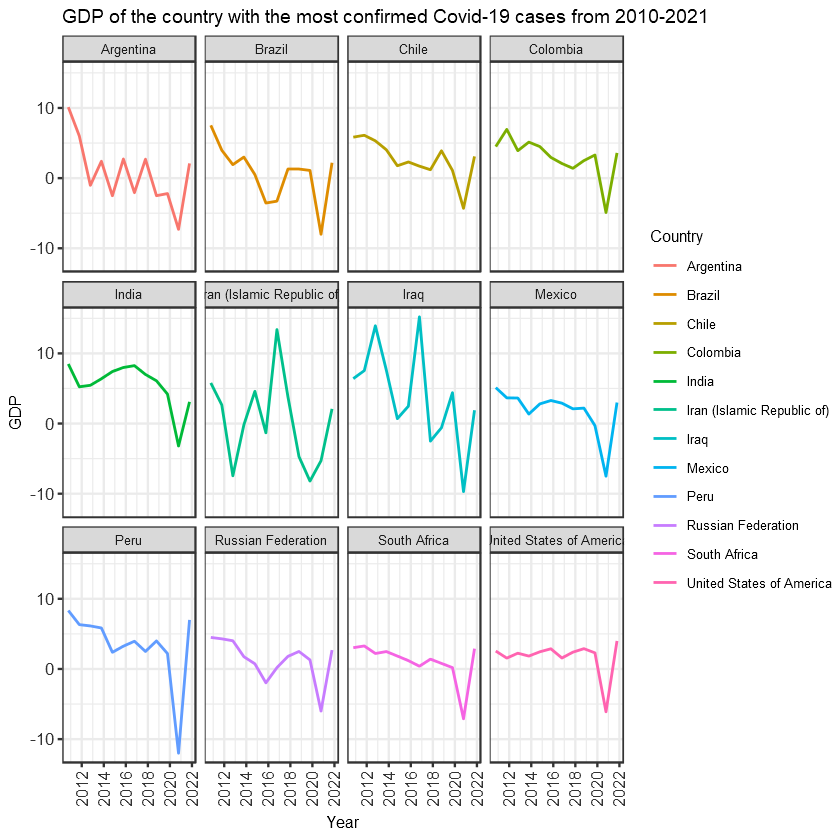

In [77]:
data_covid_top <-data_covid_month %>%
filter(yr_mouth=="2020-10-01") %>%
arrange(desc(Cumulative_cases))

data_covid_top_15 <-head(data_covid_top,15)

CountryCode<- data_WDICountry %>%
select("Country Code","2-alpha code")

CountryCode<-rename(CountryCode,Country_Code_3="Country Code",Country_Code_2="2-alpha code")

data_coid_top15_code <-left_join(data_covid_top_15,CountryCode, by=c("Country_code"="Country_Code_2"))
data_join<-left_join(data_coid_top15_code,data_GDP_His, by=c("Country_Code_3"="Country_Code"))
#Missing France, Spain, The United Kingdom GDP information
#Remove missing value
data_join<-data_join[-c(8,11,12),]
data_join_1<-data_join %>%
select(Country_Code_3,Country,"2010":"2021")
data_long <- gather(data_join_1, year, GDP, "2010":"2021", factor_key=TRUE)
data_long$year<- as.Date(data_long$year,"%Y")

#png("GDP_Confirmed_Covid19_Case.png")
data_long %>%
  ggplot(aes(x = year, y = GDP,color = Country)) + 
  geom_line(lwd=0.6) + facet_wrap(vars(Country)) +
  theme_bw() +
   theme(axis.text.x = element_text(colour = "grey20", 
                                   size = 10, angle = 90, hjust = 0.5, vjust = 0.5),
        axis.text.y = element_text(colour = "grey20", size = 10), 
        text = element_text(size = 9)) +
  xlab("Year") +  
  ylab("GDP") + 
 ggtitle("GDP of the country with the most confirmed Covid-19 cases from 2010-2021")
#dev.off()

Country_Code,Country_Name,2017,2018,2019,2020,2021
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AME,Advanced economies,2.5,2.1,1.6,-7.0,3.9
EMD,Emerging Markets and Developing Economies (EMDE),4.5,4.3,3.5,-2.5,4.6
WLD,World (WBG members),3.3,3.0,2.4,-5.2,4.2


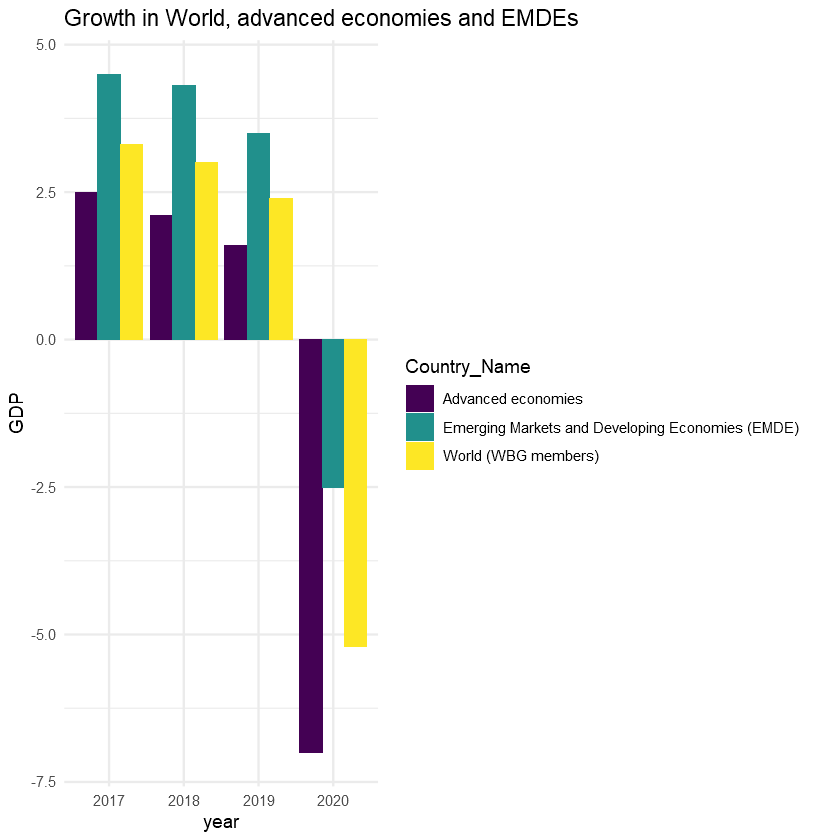

In [176]:
library("viridis")  
GDP_Country_Type <-data_GEPData %>%
filter(Country_Code=="AME"|Country_Code=="EMD"|Country_Code=="WLD")


data_long <- gather(GDP_Country_Type, year, GDP, "2017":"2020", factor_key=TRUE)
GDP_Country_Type

#png("Growth_in_wolrd_AME_EMD.png")
ggplot(data_long, aes(fill=Country_Name, y=GDP, x=year)) + 
    geom_bar(position="dodge", stat="identity")+
    scale_fill_viridis(discrete = TRUE,option="D") +
   # scale_fill_brewer(palette = "Blues") +
    theme_minimal() +
 ggtitle("Growth in World, advanced economies and EMDEs")

#dev.off()


In [92]:
mydata_summary1<-mydata_summary %>%
filter(classification=="Private consumption"|classification=="Public consumption"|classification=="Fixed investment"| classification=="Exports  GNFS"|classification=="Imports  GNFS"|classification=="Net exports  contribution to growth") %>%
select(classification,"2017":"2019e","2020fd","2021fd",area)
mydata_summary1$"2017"<-as.numeric(mydata_summary1$"2017")
mydata_summary1$"2018"<-as.numeric(mydata_summary1$"2018")
mydata_summary1$"2019"<-as.numeric(mydata_summary1$"2019e")
mydata_summary1$"2020"<-as.numeric(mydata_summary1$"2020fd")
mydata_summary1$"2021"<-as.numeric(mydata_summary1$"2021fd")
str(mydata_summary1)
result<-mydata_summary1%>%
filter(classification=="Private consumption") %>%
select("2017","2018","2019","2020","2021",area)
data_long_pc <- gather(result, year, GDP, "2017":"2021", factor_key=TRUE)


'data.frame':	36 obs. of  10 variables:
 $ classification: chr  "Private consumption" "Public consumption" "Fixed investment" "Exports  GNFS" ...
 $ 2017          : num  6.1 8.9 4.7 9.4 8.3 0.4 5.2 3.4 6.7 7.5 ...
 $ 2018          : num  8.4 8.8 5.1 4.9 8.4 -0.9 3.1 2.9 2.3 5.8 ...
 $ 2019e         : chr  "6.5" "7.8" "4.3" "1.9" ...
 $ 2020fd        : chr  "-6.1" "3.6" "-4.8" "-11.6" ...
 $ 2021fd        : chr  "2.2000000000000002" "-0.1" "-0.6" "2.2000000000000002" ...
 $ area          : chr  "EAS" "EAS" "EAS" "EAS" ...
 $ 2019          : num  6.5 7.8 4.3 1.9 0.3 0.5 1.9 3 0.5 2.4 ...
 $ 2020          : num  -6.1 3.6 -4.8 -11.6 -7.7 -1.1 -6.3 3.5 -12.9 -14.1 ...
 $ 2021          : num  2.2 -0.1 -0.6 2.2 2.7 -0.2 0.4 0.2 2.5 0.6 ...


In [79]:
data_long_pc$year<-as.Date(data_long_pc$year,"%Y")
str(data_long_pc)
git_pc<-ggplot(
  data_long_pc,
  aes(year, GDP,colour=area)
  ) +
  geom_line() +
  #scale_color_viridis_d() +
  labs(x = "Year", y = "GDP") +
  theme(legend.position = "top") + geom_point() +
  transition_reveal(year) +
  facet_wrap(~data_long_pc$area) +
  labs(title = "Private consumption by Area from 2017 to 2021") 
  anim_save("private_consumption_by_area.gif",git_pc)


'data.frame':	30 obs. of  3 variables:
 $ area: chr  "EAS" "ECS" "LCN" "MEA" ...
 $ year: Date, format: "2017-10-13" "2017-10-13" ...
 $ GDP : num  6.1 5.2 2.7 2.7 6.4 2.7 8.4 3.1 2 0.6 ...



Rendering [--------------------------------------------] at 2.9 fps ~ eta: 34s

Rendering [>-------------------------------------------] at 2.7 fps ~ eta: 36s

Rendering [>-------------------------------------------] at 2.5 fps ~ eta: 39s

Rendering [=>------------------------------------------] at 2.7 fps ~ eta: 36s

Rendering [=>------------------------------------------] at 2.8 fps ~ eta: 34s

Rendering [==>-----------------------------------------] at 2.8 fps ~ eta: 33s

Rendering [===>----------------------------------------] at 2.7 fps ~ eta: 34s

Rendering [===>----------------------------------------] at 2.8 fps ~ eta: 33s

Rendering [===>----------------------------------------] at 2.8 fps ~ eta: 32s

Rendering [====>---------------------------------------] at 2.9 fps ~ eta: 31s

Rendering [=====>--------------------------------------] at 2.9 fps ~ eta: 30s

Rendering [=====>--------------------------------------] at 2.9 fps ~ eta: 29s

Rendering [======>---------------------

In [94]:
data_result<-mydata_summary1%>%
filter(area=="ECS") %>%
select(classification,"2017","2018","2019","2020","2021")
data_long_ECA <- gather(data_result, year, GDP, "2017":"2021", factor_key=TRUE)


In [185]:
data_long_ECA$year<-as.Date(data_long_ECA$year,"%Y")
str(data_long_ECA)
git_area <-ggplot(
  data_long_ECA,
  aes(year, GDP,colour=classification)
  ) +
  scale_size(range = c(2, 12)) +
  geom_line() +
  #scale_color_viridis_d() +
  labs(x = "Year", y = "Change in percent") +
  theme(legend.position = "top") + geom_point() +
  transition_reveal(year) +
  facet_wrap(~data_long_ECA$classification) +
  labs(title = "Europe and Central Asia forecast summary from 2017 to 2021")

 anim_save("ECA.gif",git_area)

'data.frame':	30 obs. of  3 variables:
 $ classification: chr  "Private consumption" "Public consumption" "Fixed investment" "Exports  GNFS" ...
 $ year          : Date, format: "2017-10-13" "2017-10-13" ...
 $ GDP           : num  5.2 3.4 6.7 7.5 11.6 -0.8 3.1 2.9 2.3 5.8 ...



Rendering [--------------------------------------------] at 2.3 fps ~ eta: 42s

Rendering [>-------------------------------------------] at 2.3 fps ~ eta: 43s

Rendering [=>------------------------------------------] at 2.3 fps ~ eta: 42s

Rendering [==>-----------------------------------------] at 2.3 fps ~ eta: 41s

Rendering [===>----------------------------------------] at 2.3 fps ~ eta: 40s

Rendering [===>----------------------------------------] at 2.2 fps ~ eta: 40s

Rendering [====>---------------------------------------] at 2.2 fps ~ eta: 40s

Rendering [=====>--------------------------------------] at 2.2 fps ~ eta: 39s

Rendering [======>-------------------------------------] at 2.2 fps ~ eta: 39s

Rendering [======>-------------------------------------] at 2.1 fps ~ eta: 39s

Rendering [======>-------------------------------------] at 2.1 fps ~ eta: 40s

Rendering [=======>------------------------------------] at 2.1 fps ~ eta: 40s

Rendering [========>-------------------